# Practical 10 - Python for Data Science

In [1]:
# importing the required libraries,
# some of them will be imported later
# on
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the titanic data, i.e. titanic_train.csv
# and storing it in titanic
titanic = pd.read_csv('titanic_data.csv')

In [3]:
# Getting information about data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

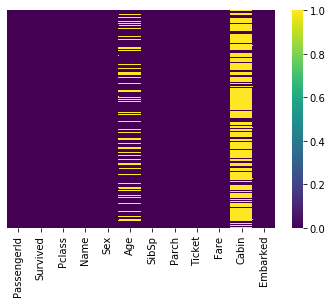

In [7]:
# Checking the columns with null values
# by heat map
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

In [8]:
# Based on above heatmap, it is clear that most of the
# Cabin information is missing, and Age data is missing.
# we will simply drop Cabin column, and apply mean]
# ages to Age column.
titanic.drop('Cabin', axis=1, inplace=True)

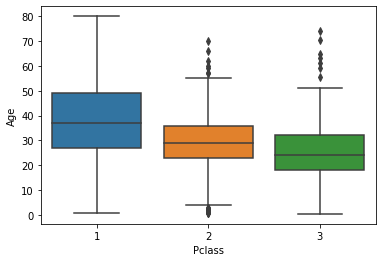

In [9]:
# getting mean age by classes
sns.boxplot(y='Age', x='Pclass', data=titanic)

### The mean age lies between 37, 31, 28 for classes 1, 2 and 3 respectively.

**Let's take the mean grouping by classes to get accurate value**

In [10]:
titanic.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
# Function that we will apply in dataset
def apply_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [12]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(apply_age, axis=1)

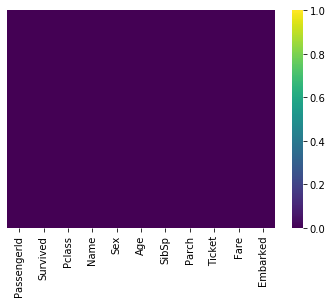

In [13]:
# Now heatmap looks good, and no missing value is present
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

## We have to delete some of the tables, which are not required, but we will do it after EDA.

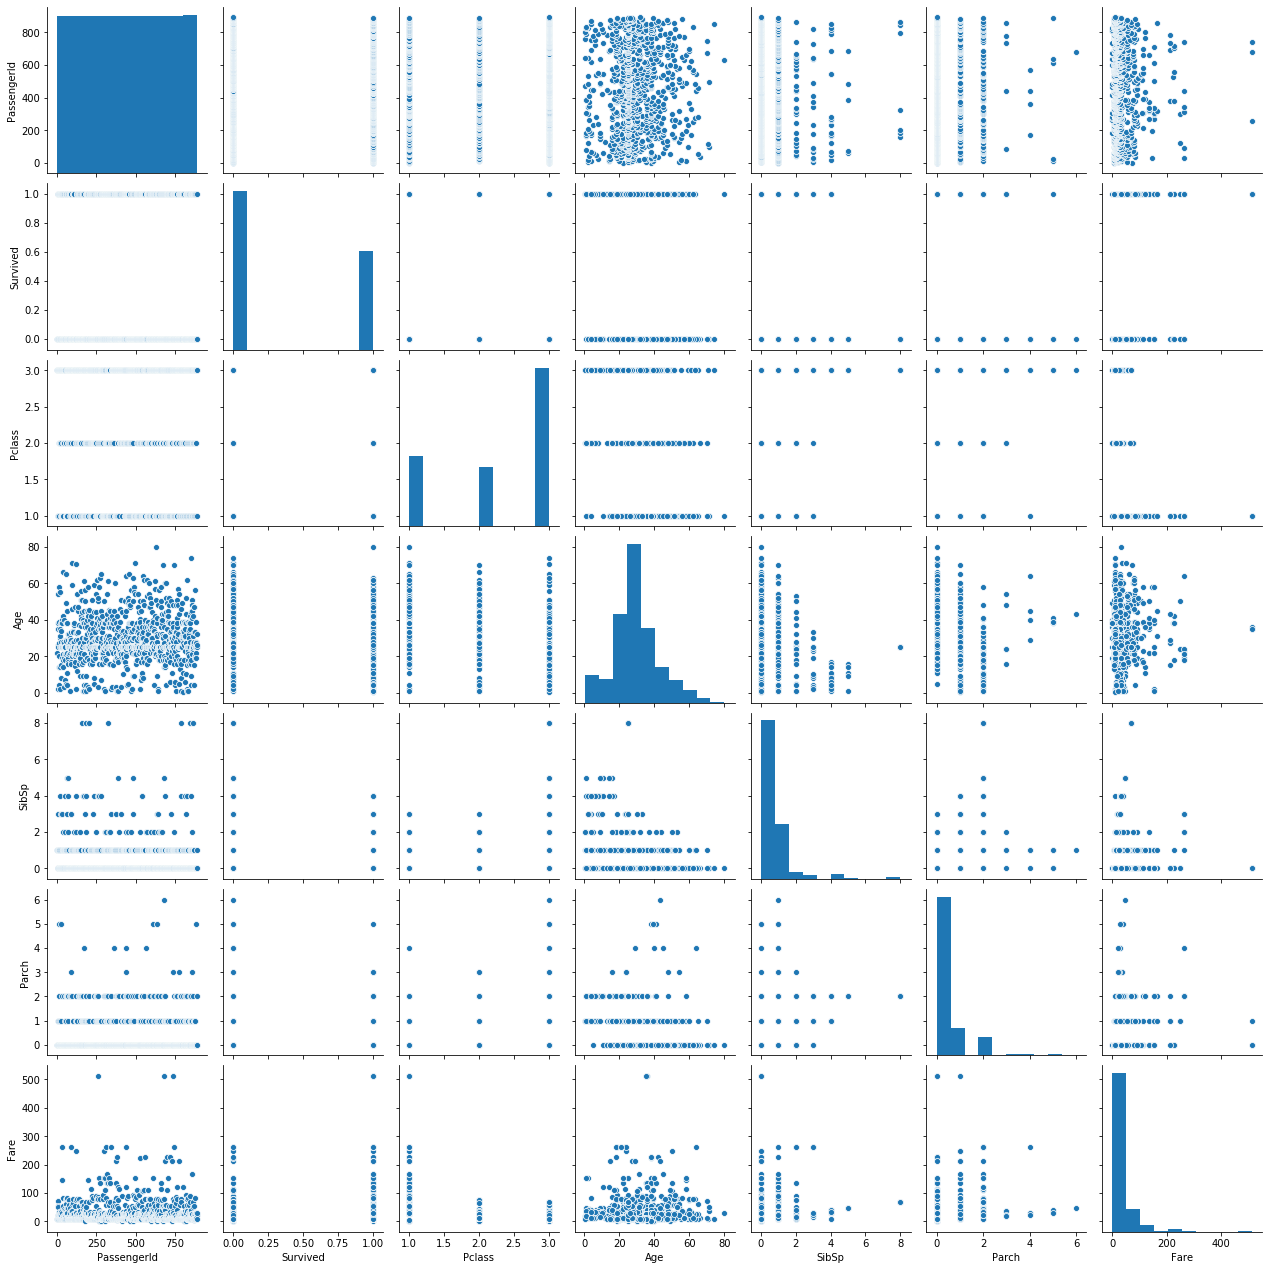

In [14]:
# Plotting a pairplot in order to get all the possible 
# graphs
sns.pairplot(titanic)

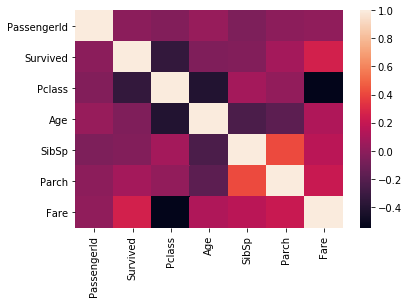

In [15]:
# Plotting heatmap and clustermap to visualize the corelation between the 
# columns
sns.heatmap(titanic.corr())

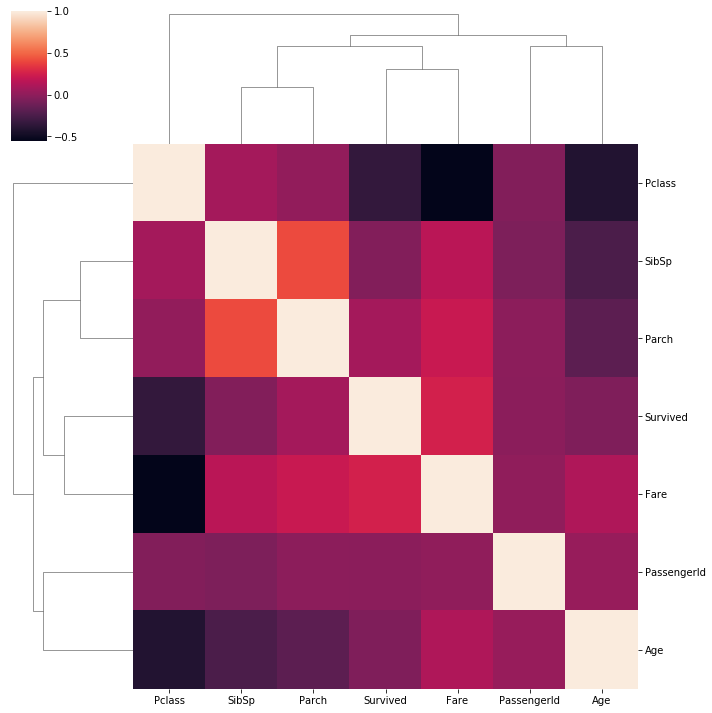

In [16]:
sns.clustermap(titanic.corr())

## Some of the info can be figured out like how some factors are related to the survival rate

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# now we need to make data usable to feed it
# in the machine learning algorithm
# we will change Sex col from male - female 
# to 0 1 and same for embarked
titanic['Male'] = pd.get_dummies(titanic['Sex'], drop_first=True)
titanic[['Q', 'S']] = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Let's perform some more EDA

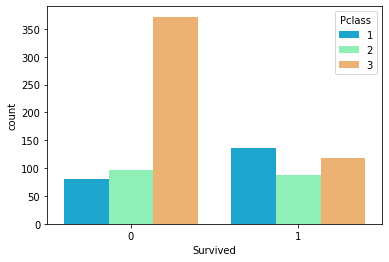

In [20]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

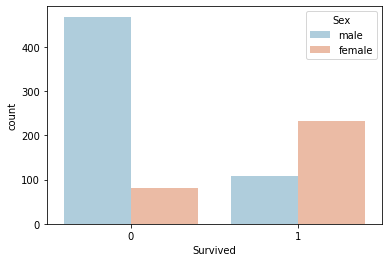

In [21]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

### Now after converting characters in numerical value, we will delete the columns which are not required, like Name, Sex, Ticket and Embarked, because they won't actually contribute much in our machine learning model.

In [22]:
titanic.drop(['Sex', 'Name', 'Ticket', 'Embarked', 'PassengerId'], axis=1, inplace=True)

In [23]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'Q',
       'S'],
      dtype='object')

### Splitting the data in Features and prediction

In [25]:
# Features
X = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'Q', 'S']]
# Prediction
y = titanic['Survived']

In [26]:
# importing train_test_split to split the data in
# training and testing set
from sklearn.model_selection import train_test_split
# Splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 1. Logistic Regression

In [27]:
# importing the logistic regression model and fitting the train set
from sklearn.linear_model import LogisticRegression

logdata = LogisticRegression(max_iter=1000)
logdata.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Prediction usiung test data
prediction = logdata.predict(X_test)

### Testing the accuracy of the prediction

In [29]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       173
           1       0.80      0.64      0.71        95

    accuracy                           0.82       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.82      0.82      0.81       268



In [30]:
# Precision is somewhat 0.80 in average
# Let's see the confusin matrix as well
confusion_1 = metrics.confusion_matrix(y_test, prediction)
print(confusion_1)

[[158  15]
 [ 34  61]]


In [31]:
precision_0 = []
precision_1 = []

precision_0.append(0.85)
precision_1.append(0.80)

# 2. Support Vector Machines (SVM)

### Since we already have dataset, and we want to classify whether or not a patient survives, we can use this same dataset.

In [32]:
from sklearn.svm import SVC

In [33]:
svm = SVC()

In [34]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
predict = svm.predict(X_test)

In [36]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       173
           1       0.64      0.28      0.39        95

    accuracy                           0.69       268
   macro avg       0.67      0.60      0.59       268
weighted avg       0.68      0.69      0.65       268



In [37]:
confusion_2 = metrics.confusion_matrix(y_test, predict)
print(confusion_2)

[[158  15]
 [ 68  27]]


In [38]:
precision_0.append(0.66)
precision_1.append(0.74)

# 3. Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gnb = GaussianNB()

In [41]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
predict = gnb.predict(X_test)

In [43]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       173
           1       0.68      0.67      0.68        95

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [44]:
confusion_3 = metrics.confusion_matrix(y_test, predict)
print(confusion_3)

[[143  30]
 [ 31  64]]


In [45]:
precision_0.append(0.85)
precision_1.append(0.76)

# 4. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier()

In [48]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
predict = clf.predict(X_test)

In [50]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       173
           1       0.71      0.64      0.67        95

    accuracy                           0.78       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.78      0.78      0.78       268



In [51]:
confusion_4 = metrics.confusion_matrix(y_test, predict)
print(confusion_4)

[[148  25]
 [ 34  61]]


In [52]:
precision_0.append(0.83)
precision_1.append(0.74)

# 5. AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
aclf = AdaBoostClassifier(n_estimators=125)

In [55]:
aclf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=125, random_state=None)

In [56]:
predict = aclf.predict(X_test)

In [57]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       173
           1       0.66      0.64      0.65        95

    accuracy                           0.76       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.76      0.76      0.76       268



In [58]:
confusion_5 = metrics.confusion_matrix(y_test, predict)
print(metrics.confusion_matrix(y_test, predict))

[[142  31]
 [ 34  61]]


In [59]:
precision_0.append(0.85)
precision_1.append(0.79) 

# Comparision of all the methods for the Titanic dataset

## We will do a plot of precision of all the models.

In [60]:
from scipy.interpolate import make_interp_spline

Text(0.5, 1.0, 'Models and their accuracy')

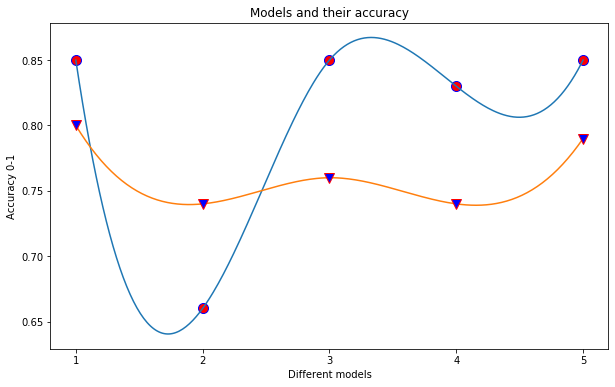

In [78]:
plt.figure(figsize=(10, 6))
x1_smooth = np.linspace(1, 5, 300)
y1_smooth = make_interp_spline(range(1,6), precision_0)(x1_smooth)
plt.plot(range(1,6), precision_0, linestyle='', marker='o', markersize=10, markerfacecolor='Red',
        color='blue')
plt.plot(x1_smooth, y1_smooth)
x2_smooth = np.linspace(1, 5, 300)
y2_smooth = make_interp_spline(range(1,6), precision_1)(x2_smooth)
plt.plot(x2_smooth, y2_smooth)
plt.plot(range(1,6), precision_1, marker='v', markersize=10, markerfacecolor='blue',
        color='red', linestyle='')
plt.xlabel('Different models')
plt.ylabel('Accuracy 0-1')
plt.xticks([1, 2, 3, 4, 5])
plt.title('Models and their accuracy')